# Are Tracker Posts in the Simulation?

Adam Lyon / 7 July 2015

In [1]:
!pwd

/Users/lyon/dataAnalysisPlatform/Documents/g-2/trackerPostsVis


Dave Hertzog asked if tracker posts are in the `gm2ringsim` apparatus. There should be posts on the side of the tracker box against the tracker chamber wall to make a standoff. One could, of course, look at the code, but it's more fun to make pictures!

**The Plan:** We'll run released `gm2ringsim` from `gm2 v6_01_00 -q prof` and use a FCL file with the straw trackers turned on. Then we'll produce one event, just to get the geometry visualization file. Then we'll look with ParaView.

To open a window in the development area...

In [2]:
%%file start-iTerm.scr
tell application "iTerm"
    activate
    set myterm to (make new terminal)
    tell myterm
        launch session "Default Session"
        tell the last session   
            set name to "trackerPosts"
            write text "source /cvmfs/oasis.opensciencegrid.org/gm2/prod/g-2/setup"
            write text "cd ~/Development/g-2/temp/trackerPosts"
            write text "setup gm2 v6_01_00 -q prof"
            write text "export PATH=$PATH:/Applications/paraview4.3.1.app/Contents/bin"
        end tell
    end tell
end tell

Overwriting start-iTerm.scr


In [3]:
!osascript start-iTerm.scr

We need to modify the `vis.mac` file and the main FCL file to turn on visualization.

Let's try to do all this work from this notebook.

In [4]:
%load_ext ipythonPexpect

%ipythonPexpect? for help


In [5]:
%pexpect_spawn_bash

Opened connection to /usr/bin/env bash
bash-3.2$ PS1='bash> '
bash> 

In [6]:
%pexpect_lock

To return to IPython, issue %pexpect_unlock


In [7]:
cd ~/Development/g-2/temp/trackerPosts/

In [8]:
source /cvmfs/oasis.opensciencegrid.org/gm2/prod/g-2/setup

g-2 software
--> To list gm2 releases, type
ups list -aK+ gm2
--> To use the latest release, do
setup gm2 v6_01_00 -q prof
For more information, see https://cdcvs.fnal.gov/redmine/projects/g-2/wiki/ReleaseInformation


In [9]:
setup gm2 v6_01_00 -q prof

Copy a general fcl file and turn on visualization (doesn't really matter which one, so long as the trackers are turned on).

In [10]:
cp $GM2RINGSIM_DIR/fcl/ProductionMuPlusMuonGasGun.fcl runThis.fcl

Are straw trackers turned on?

In [11]:
grep -i StrawTracker runThis.fcl

#include "geom/strawtracker.fcl"
      strawtracker: @local::strawtracker_geom
    StrawTracker: {}


Modify the fcl file to turn on visualization

In [12]:
cat << EOT >> runThis.fcl
physics.producers.artg4.enableVisualization : true
physics.producers.artg4.afterEvent : pass
EOT

In [13]:
tail runThis.fcl

}
services.user.Geometry.quad.DoScraping : false
services.user.Geometry.kicker.kPlate1HV : 0 //kilovolt
services.user.Geometry.kicker.kPlate2HV : 0 //kilovolt
services.user.Geometry.kicker.kPlate3HV : 0 //kilovolt
services.user.Geometry.kicker.kickerHV : [0 , 0 , 0 ] //kilovolt
physics.producers.artg4.enableVisualization : true
physics.producers.artg4.afterEvent : pass


Write my own `vis.mac` file with the ParaView compatible visualization

In [14]:
cat << EOT > vis.mac
# Open HepRepXML
/vis/open HepRepXML

# Don't write the geometry to every event; just write it once
/vis/heprep/appendGeometry false
/vis/heprep/addPointAttributes 1

# Some configuration
/vis/drawVolume
/vis/viewer/set/lineSegmentsPerCircle 240
/vis/scene/add/trajectories smooth
/vis/modeling/trajectories/create/drawByCharge
/vis/modeling/trajectories/drawByCharge-0/default/setDrawStepPts true
/vis/modeling/trajectories/drawByCharge-0/default/setStepPtsSize 1
/vis/scene/endOfEventAction accumulate
/vis/viewer/set/autoRefresh true
/vis/verbose warnings
EOT

Let's run the simulation and make just one event (ignore the errors about IKE).

In [15]:
gm2 -c runThis.fcl -n 1 > out

ERROR: No HepRepDefaults, trying to get value for: IKE
ERROR: No HepRepDefaults, trying to get value for: IKE


In [16]:
ls scene-0.heprep.zip

scene-0.heprep.zip


In [17]:
%pexpect_unlock

Notebook will use IPython


Now we want to run ParaView with the `GeantToVTK` plugin. See https://cdcvs.fnal.gov/redmine/projects/geanttovtk/wiki for download and instructions.

Now start up ParaView and load in the `scene-0.heprep.zip` file with the geometry reader. Only choosing arc "6" and moving things around, I see the following:

In [18]:
cd /Users/lyon/dataAnalysisPlatform/Documents/g-2/trackerPostsVis

/Users/lyon/dataAnalysisPlatform/Documents/g-2/trackerPostsVis


In [19]:
from IPython.display import Image

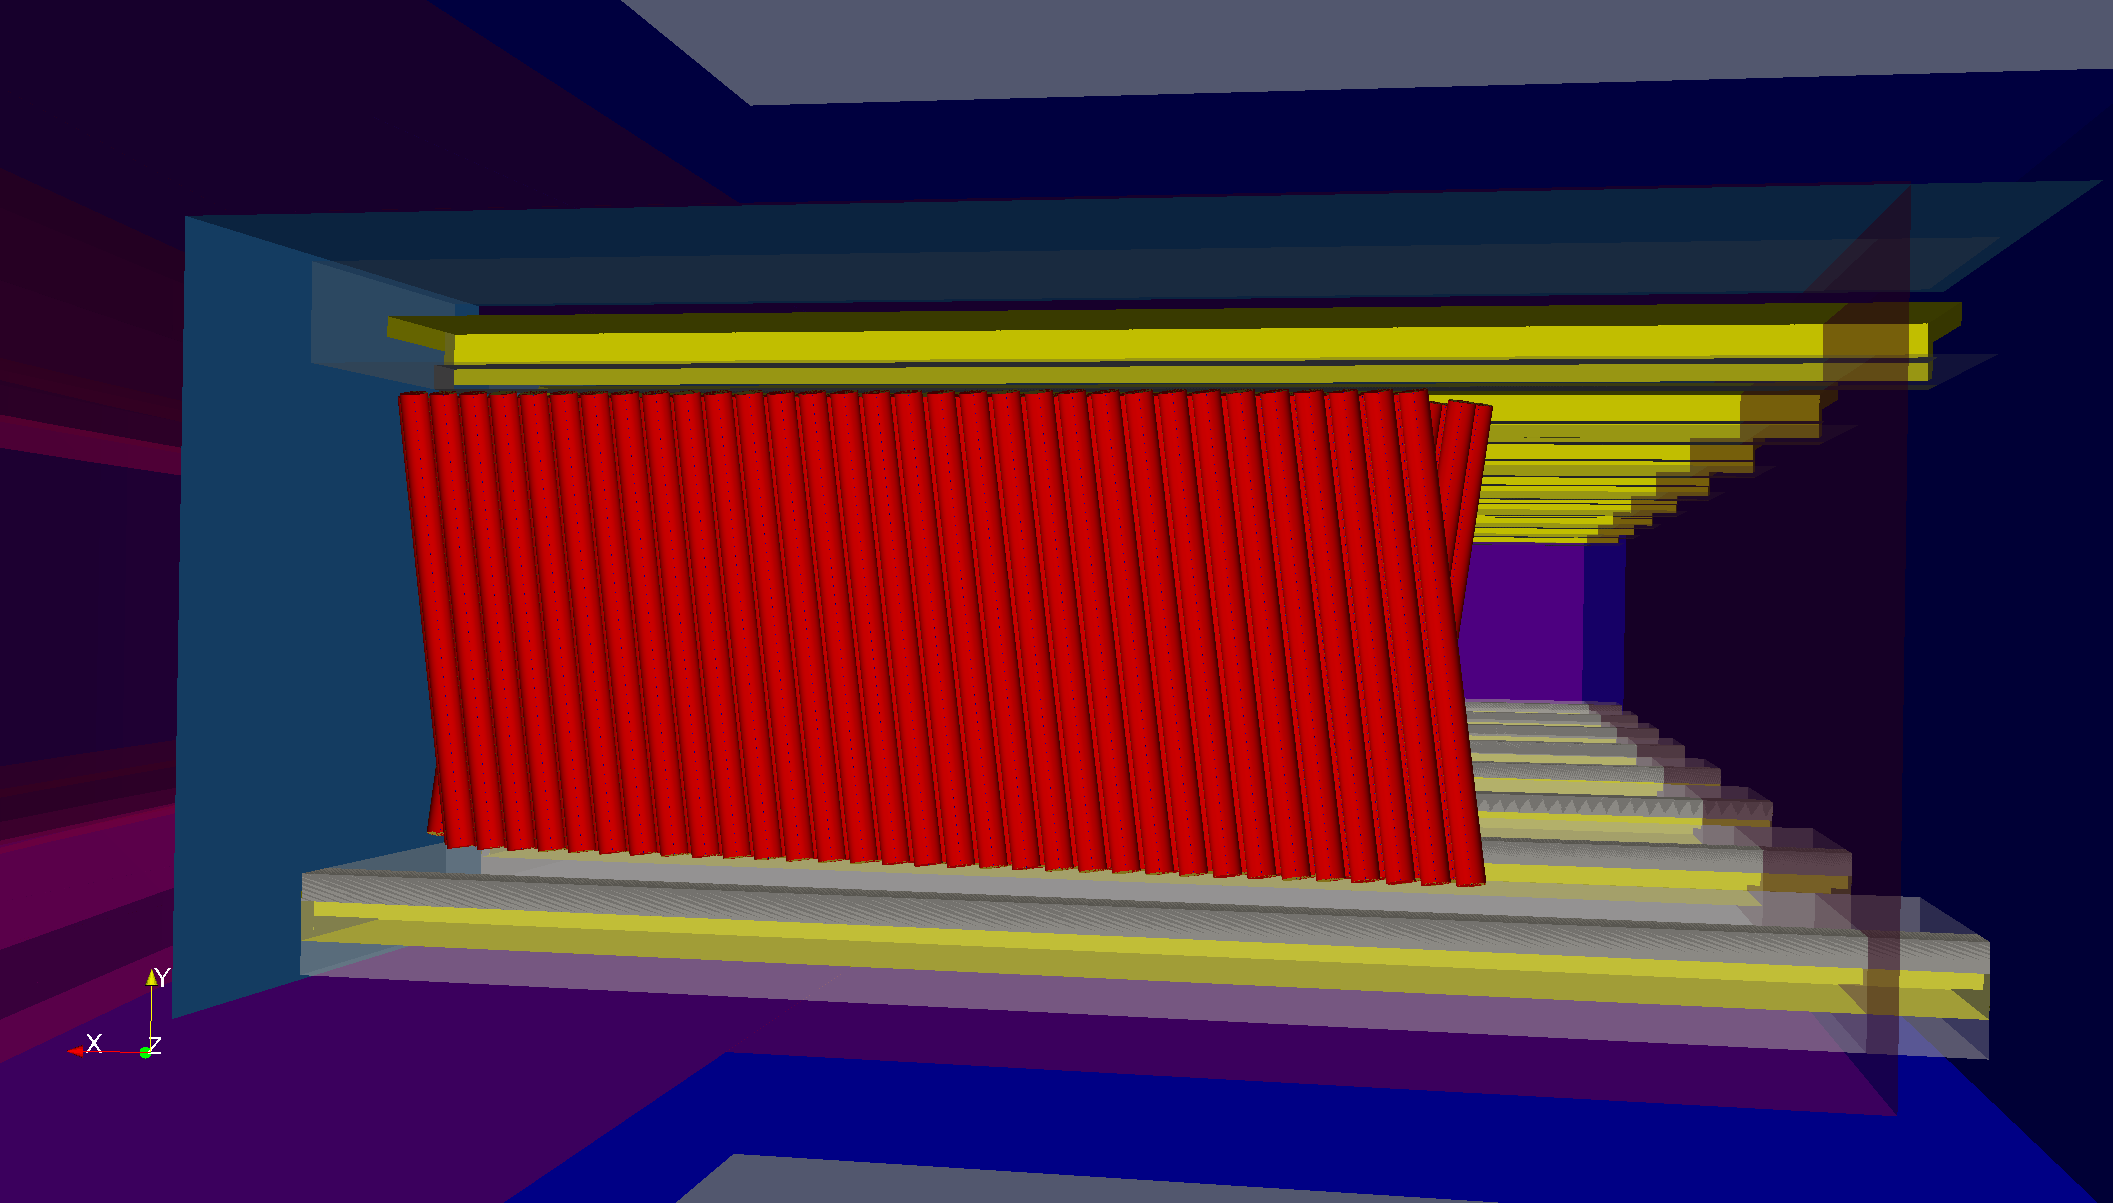

In [20]:
Image("dave1.png")

The storage region is on the left. This is looking down the scallop region towards the calorimeter. Storage region is on the left.

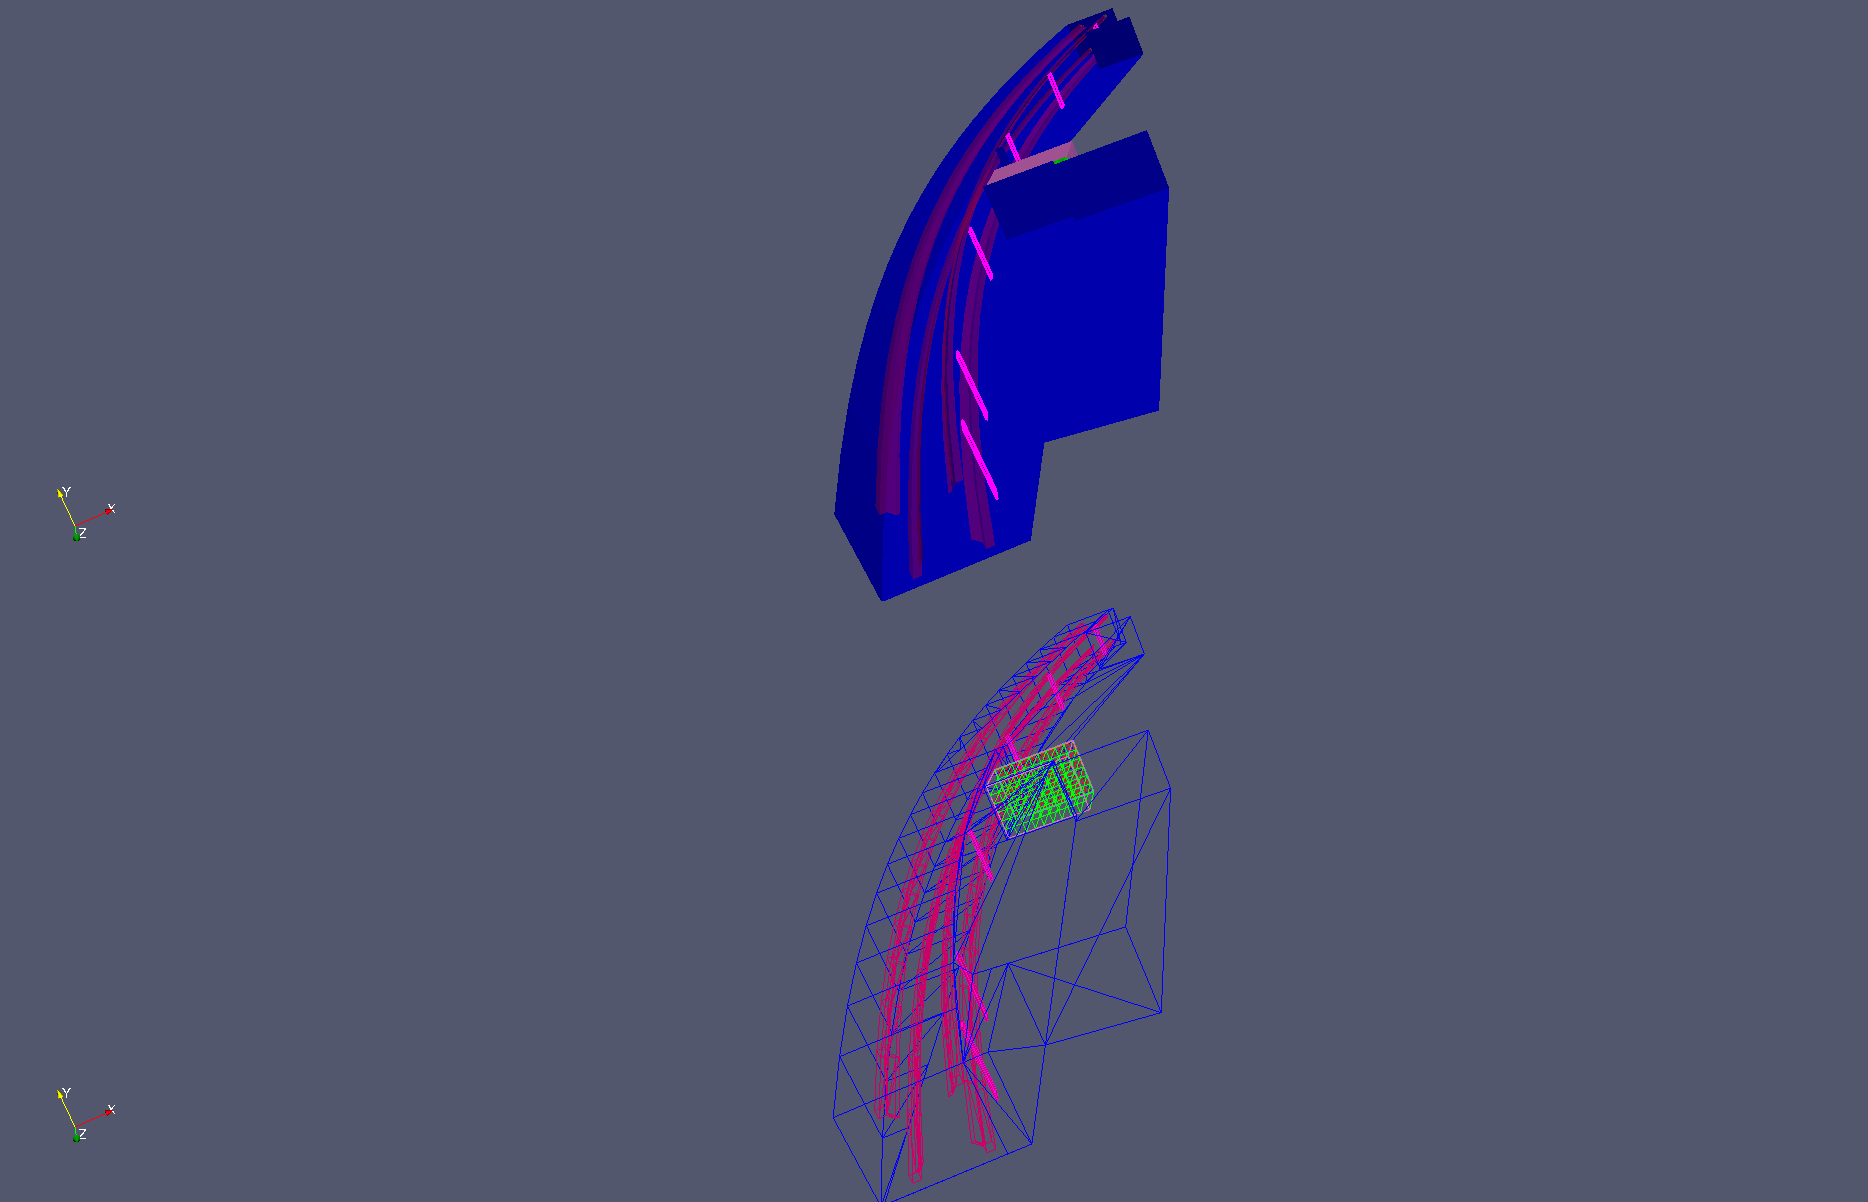

In [21]:
Image("dave2.png")

The picture here is just of the vacuum stuff and calorimeter - no trackers. You can see trolley rails (purple) and rail bars (bright purple). The pictures are the same, except that the top has front face culling and the bottom is a wire frame.

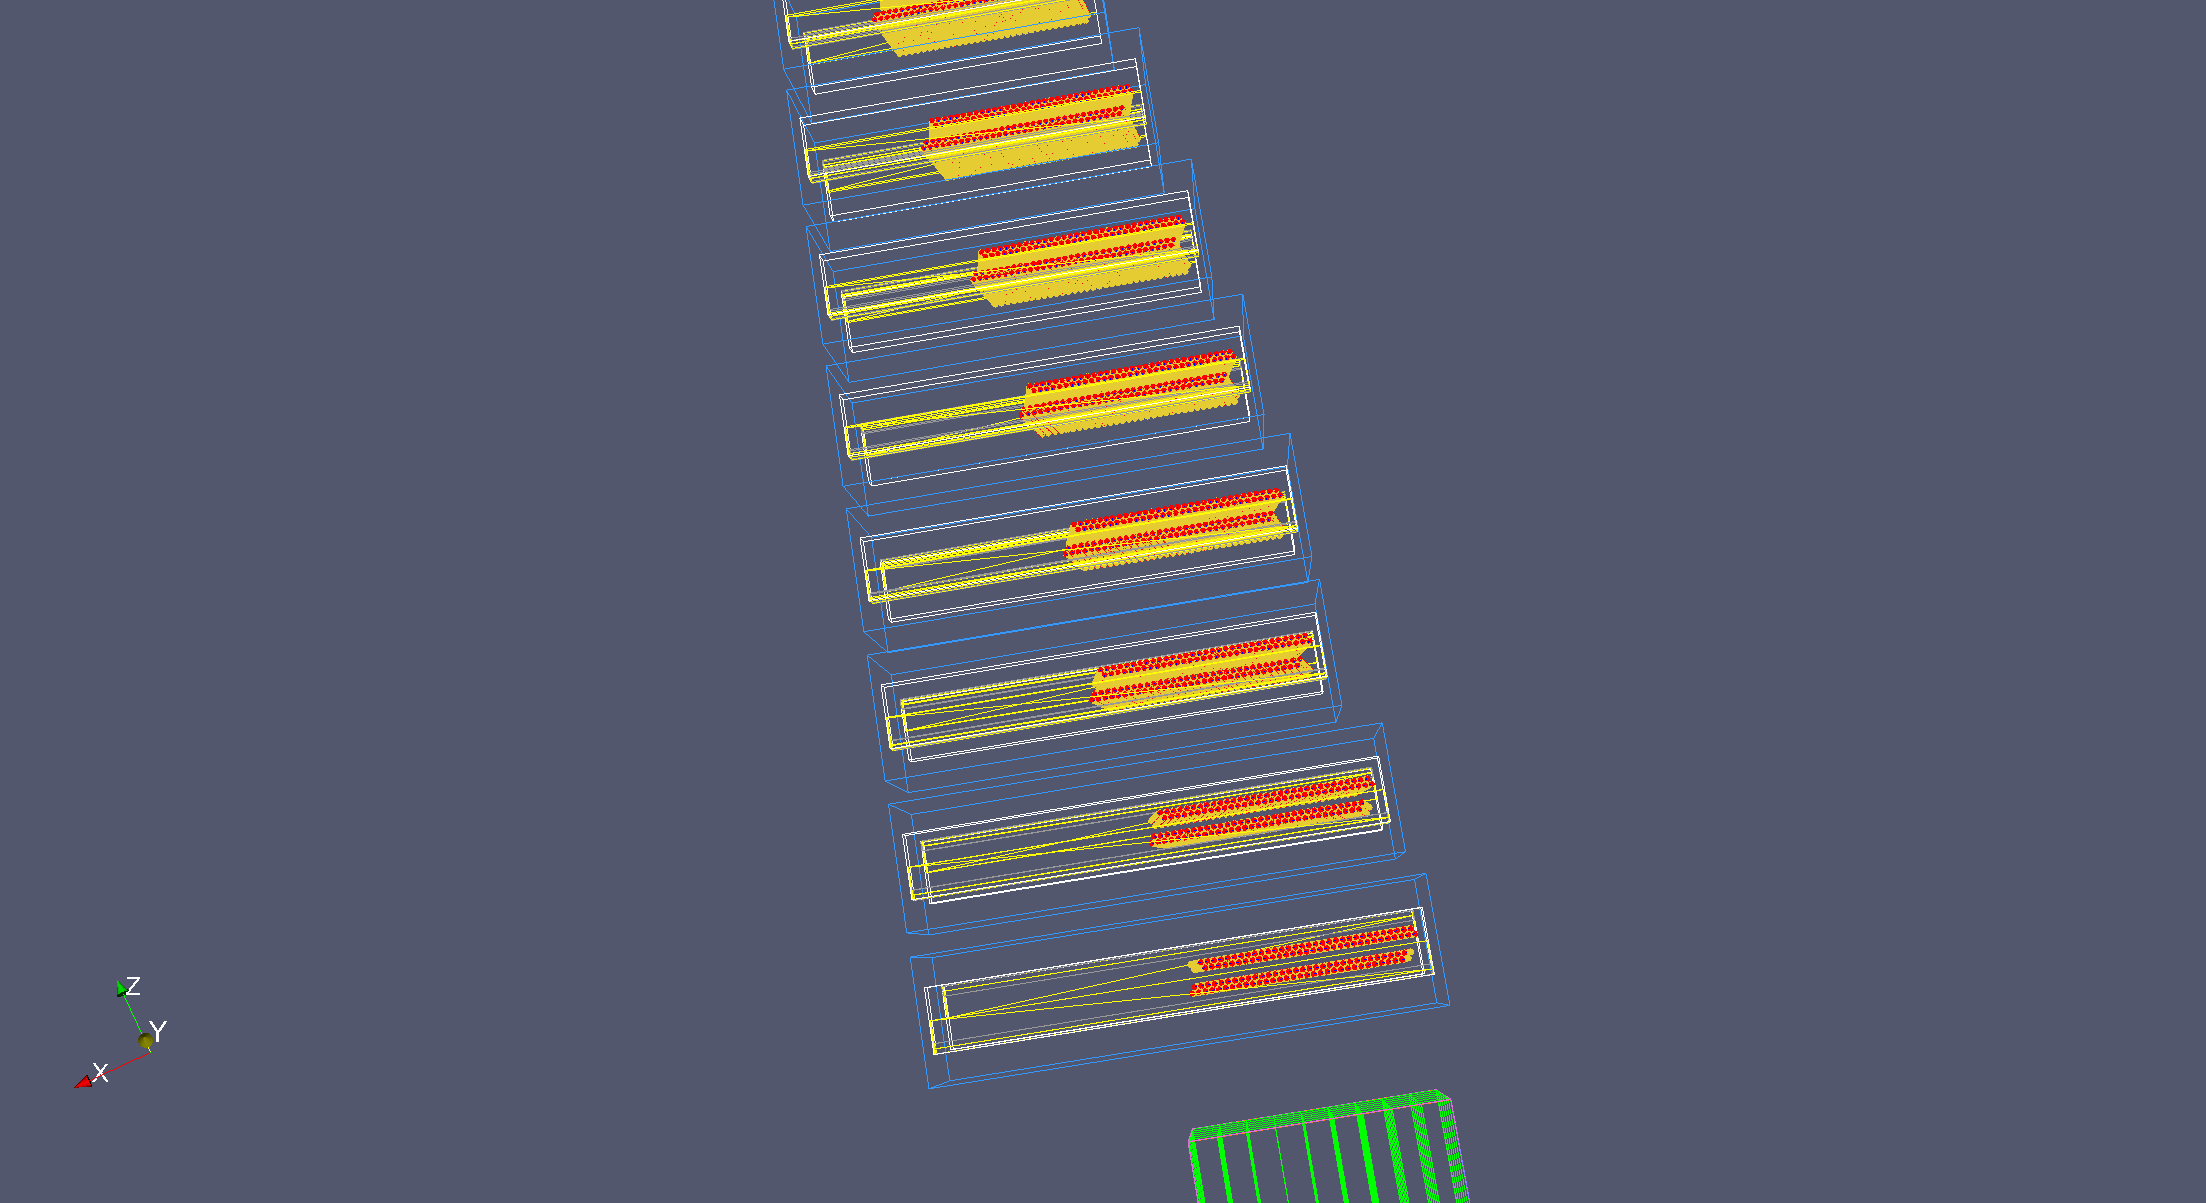

In [22]:
Image("dave3.png")

Top view of trackers. Storage region is on the right.

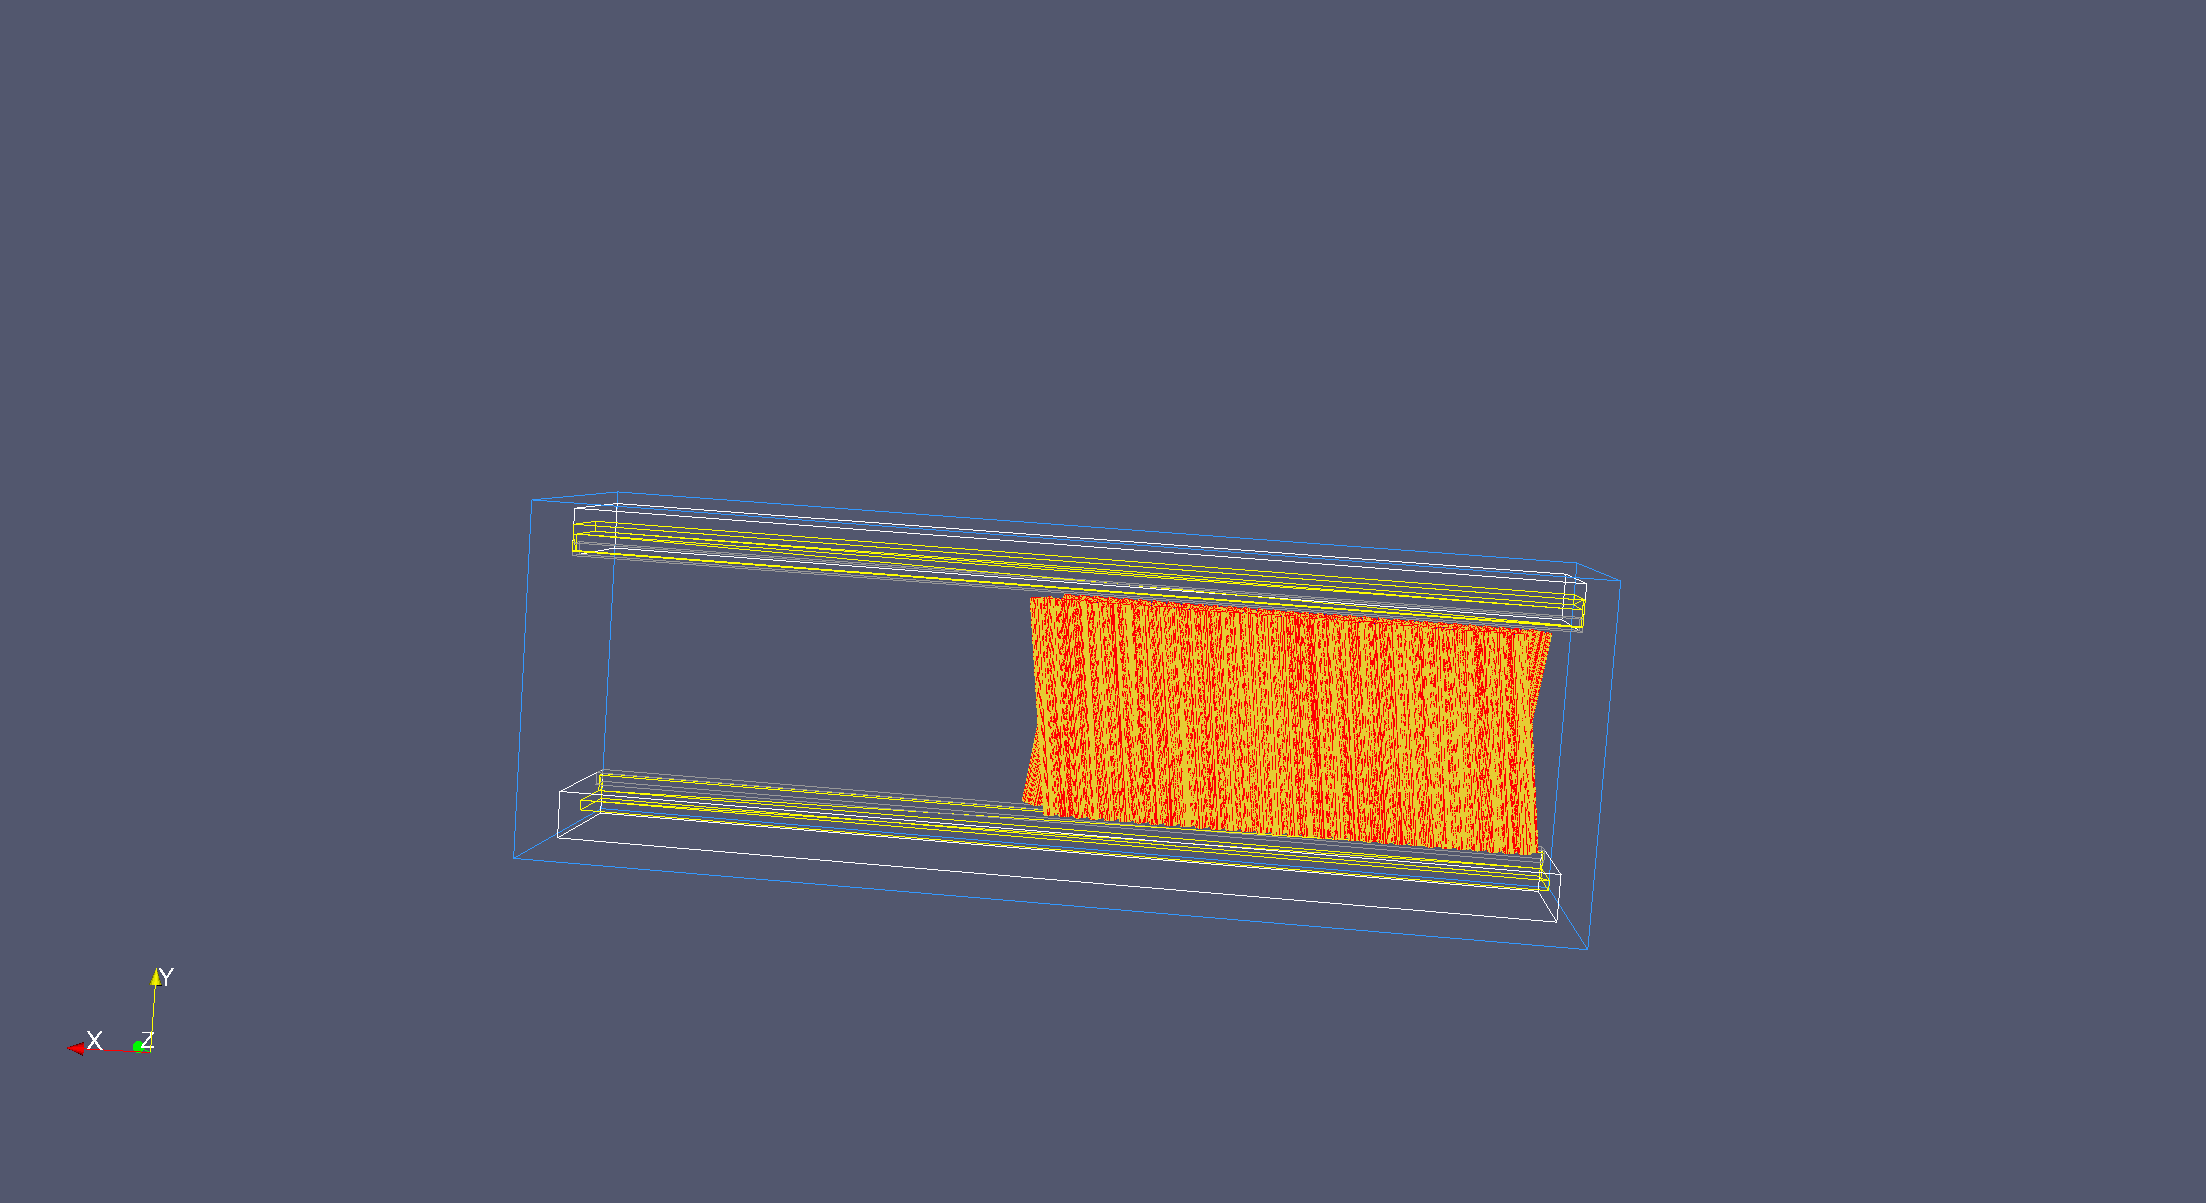

In [23]:
Image("dave4.png")

One tracker assembly. Storage region is on the right. 

**I don't see any posts!**

Leah says that tracker posts are in the code and are set by a boolean flag. Let's turn them on and look again (or look at both and compare). 

In [24]:
%pexpect_spawn_bash

Closing old connection
Opened connection to /usr/bin/env bash
bash-3.2$ PS1='bash> '
bash> 

In [25]:
%pexpect_lock

To return to IPython, issue %pexpect_unlock


In [26]:
cd ~/Development/g-2/temp/trackerPosts/
source /cvmfs/oasis.opensciencegrid.org/gm2/prod/g-2/setup
setup gm2 v6_01_00 -q prof

g-2 software
--> To list gm2 releases, type
ups list -aK+ gm2
--> To use the latest release, do
setup gm2 v6_01_00 -q prof
For more information, see https://cdcvs.fnal.gov/redmine/projects/g-2/wiki/ReleaseInformation


The FCL file `runThis.fcl` is already there. Alter it to turn on the posts. The change is in `gm2geom/strawtracker/strawtracker.fcl`. Change `buildSupportPost` to `true`.

In [27]:
cat << EOT >> runThis.fcl
services.user.Geometry.strawtracker.buildSupportPost : true
EOT

In [28]:
tail runThis.fcl

services.user.Geometry.quad.DoScraping : false
services.user.Geometry.kicker.kPlate1HV : 0 //kilovolt
services.user.Geometry.kicker.kPlate2HV : 0 //kilovolt
services.user.Geometry.kicker.kPlate3HV : 0 //kilovolt
services.user.Geometry.kicker.kickerHV : [0 , 0 , 0 ] //kilovolt
physics.producers.artg4.enableVisualization : true
physics.producers.artg4.afterEvent : pass
services.user.Geometry.strawtracker.buildSupportPost : true


Let's copy the old visualization file so we don't overwrite it. 

In [29]:
mv scene-0.heprep.zip nopost.heprep.zip

Run it again

In [30]:
gm2 -c runThis.fcl -n 1 > out

ERROR: No HepRepDefaults, trying to get value for: IKE
ERROR: No HepRepDefaults, trying to get value for: IKE


In [31]:
mv scene-0.heprep.zip post.heprep.zip

In [32]:
ls *heprep*

nopost.heprep.zip	post.heprep.zip


In [33]:
%pexpect_unlock

Notebook will use IPython


Running ParaView again and compare.

We'll look at Arc "6" again ("6" is in quotes because that's gm2ringsim's counting where the arc with the inflector is 11 and the next arc clockwise is 0). 

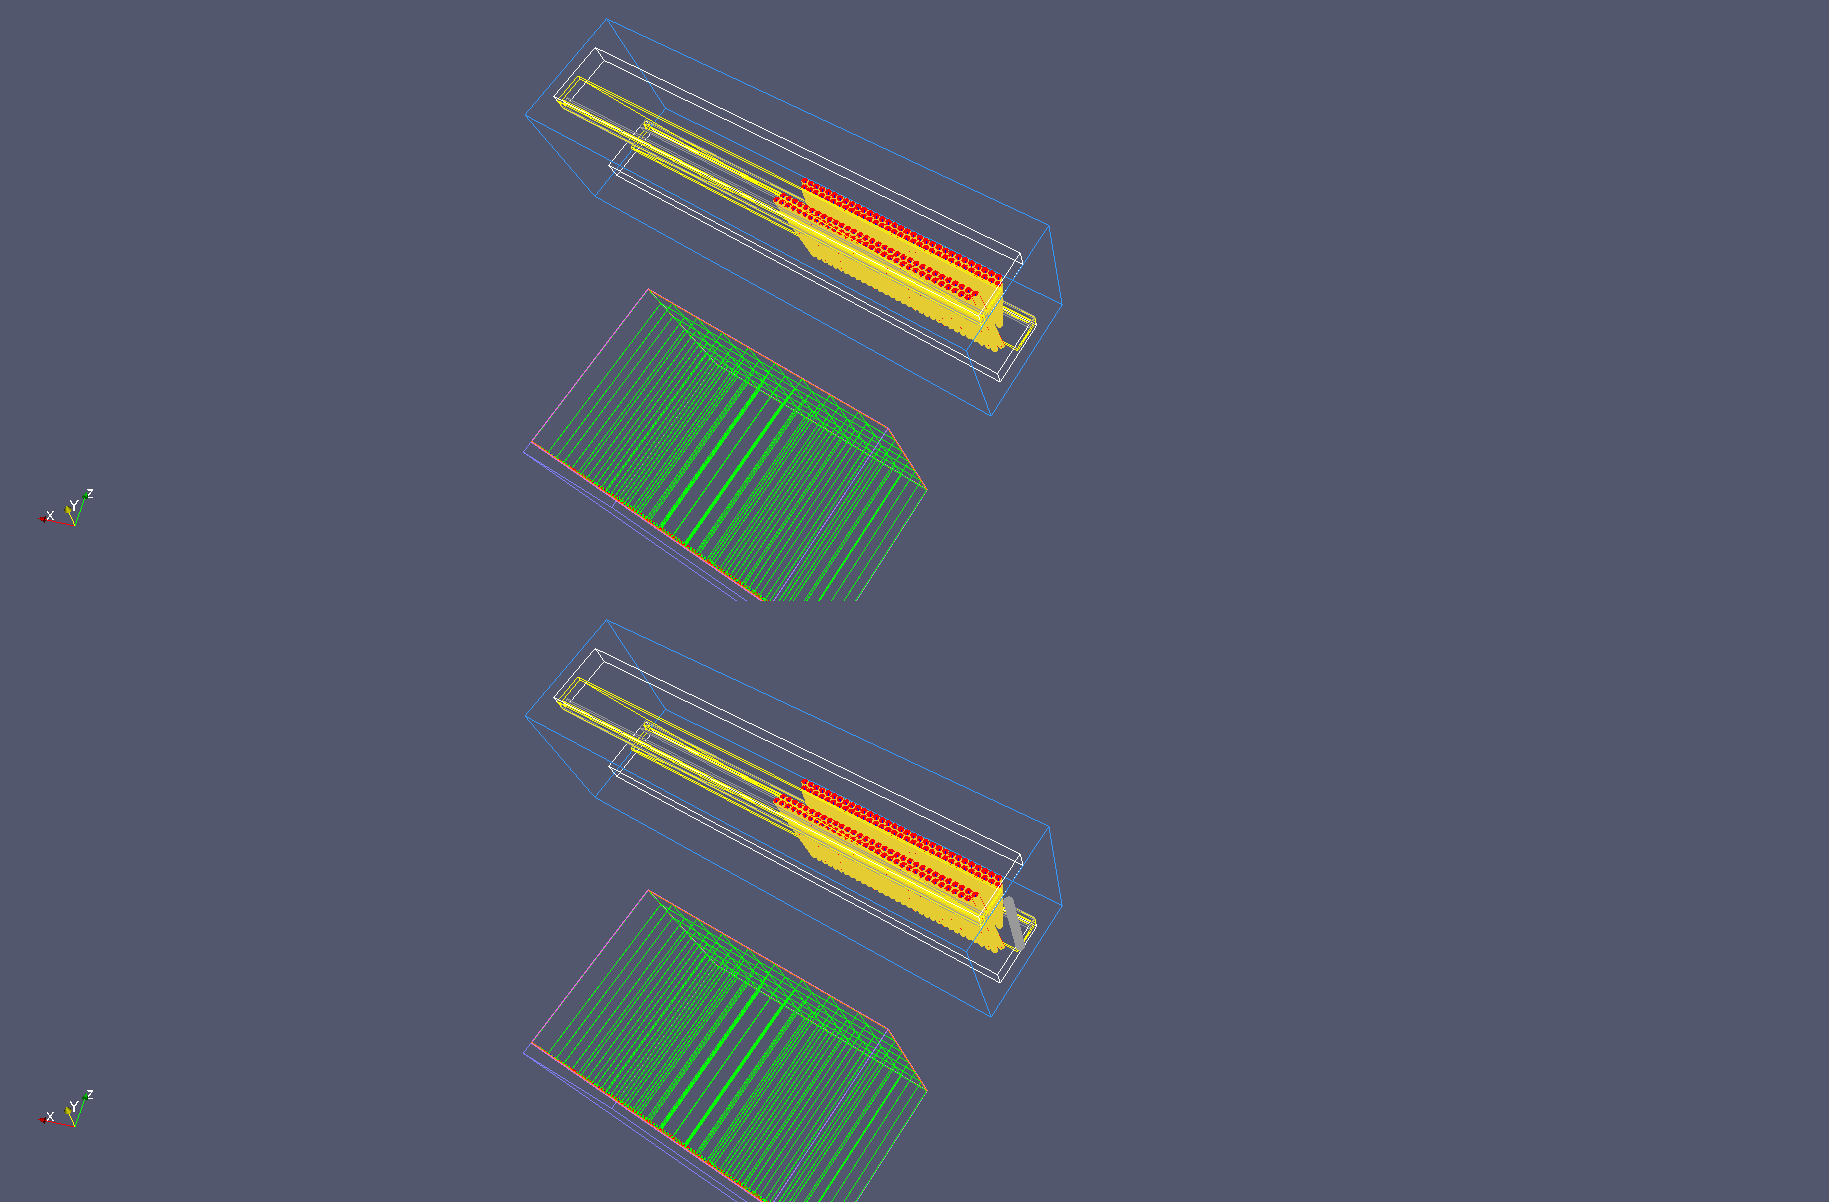

In [36]:
Image("postCompare.png")

The top part is the original run without the post. The bottom part is the run with the post turned on. The post is clearly shown in the right side of the tracker box. (use `postCompare2.pvsm` state file to regenerate).

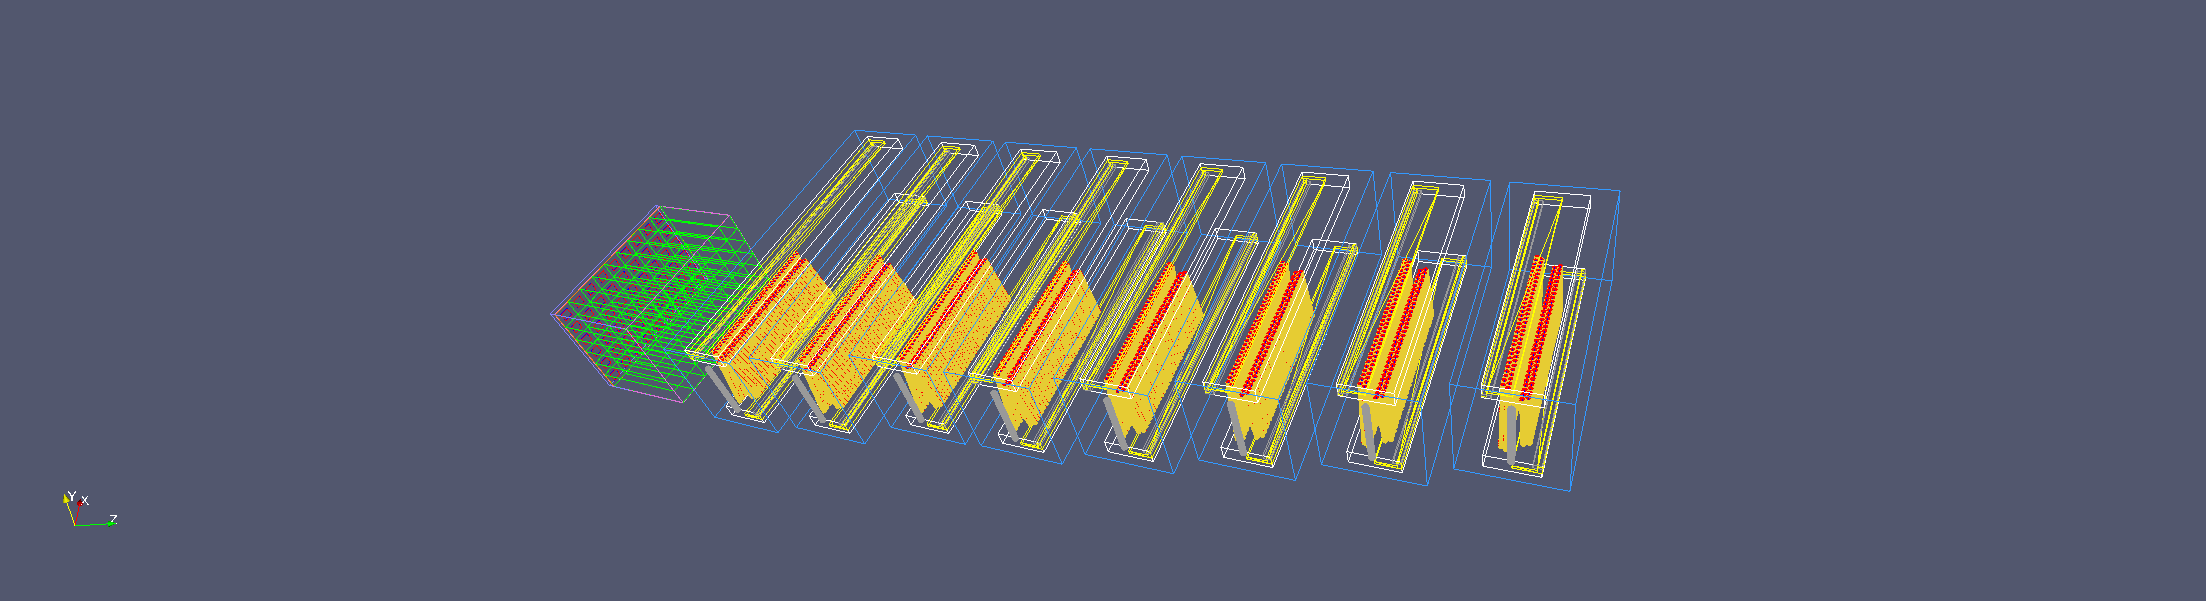

In [37]:
Image("postCompareAll.png")

Here are all of the trackers with posts for arc "6". Use `postCompare3.pvsm` to regenerate.

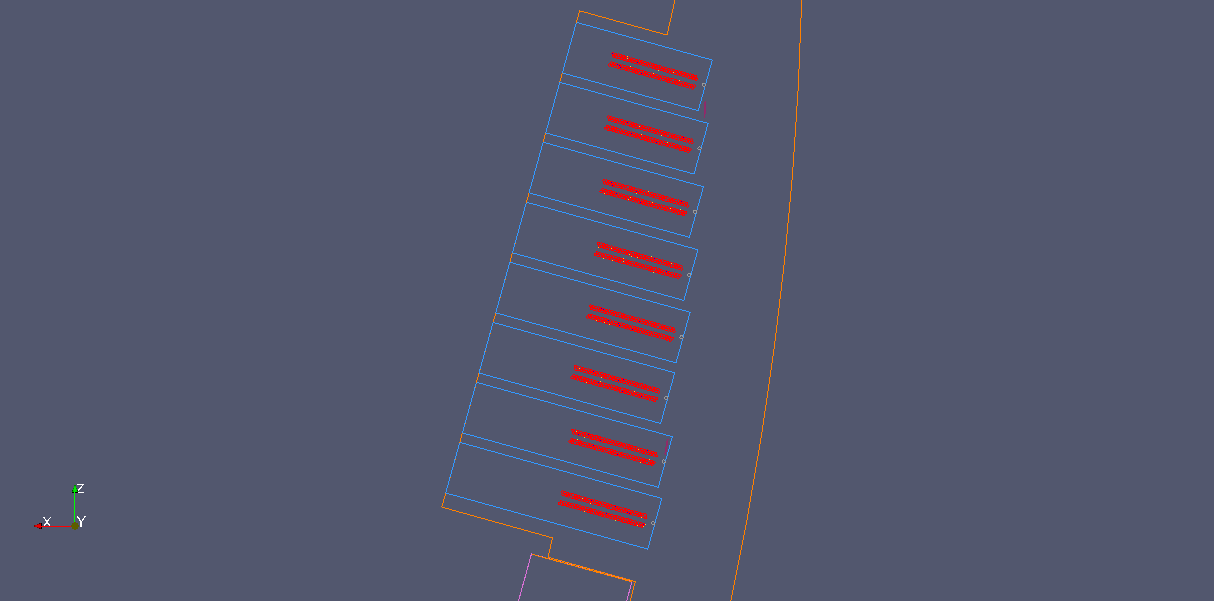

In [38]:
Image("postSlice.png")

A 2D slice at y=0. Note the trolley post inside the tracker box for the 2nd tracker up from the calorimeter. (`postCompareSlice.pvsm`)

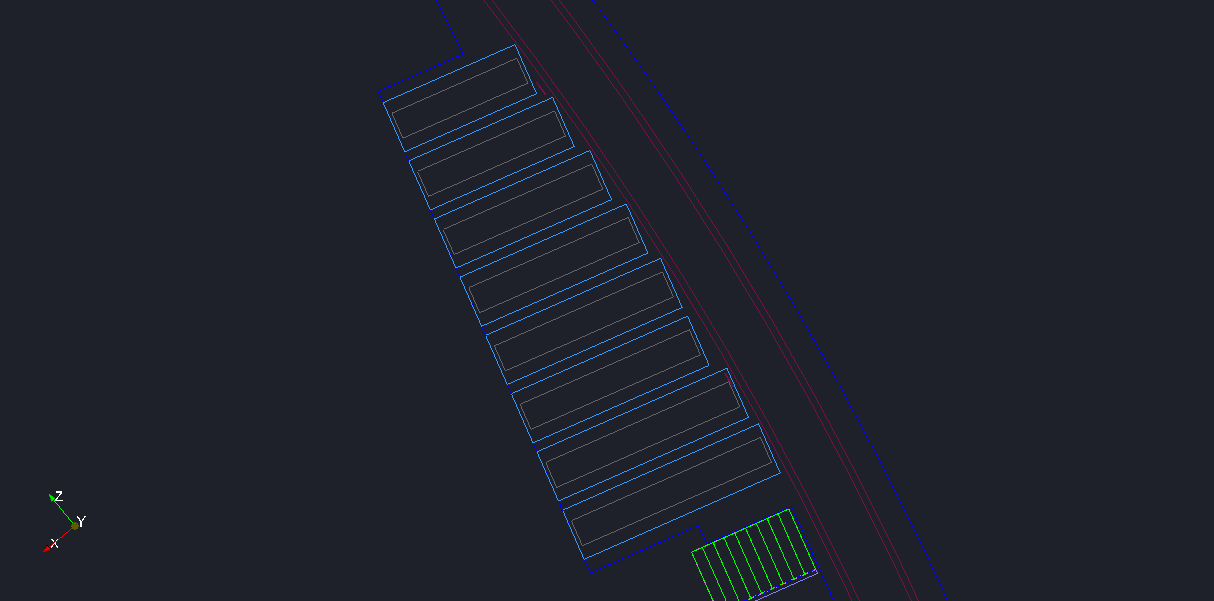

In [39]:
Image("postSliceUp.png")

Slice at y=+6.1 cm. Now you can see the trolley rails. (`postCompareSliceUp.pvsm`)

Leah says that the trolley post inside the tracker is not a big deal. The tracker box size is still not settled and perhaps the trolley post can be moved. 